In [127]:
import pandas as pd
import datetime as dt

In [128]:
ques_morning_dams = pd.read_csv('./datas/questionaire_data/ques_morning_dams.csv')
ques_morning_time = pd.read_csv('./datas/questionaire_data/ques_morning/ques_morning_dams.csv')

In [129]:
ques_morning_time['Date'] = pd.to_datetime(ques_morning_time['datetime']).dt.date
ques_morning_dams['Date'] = pd.to_datetime(ques_morning_dams['Date']).dt.date
ques_morning_date = ques_morning_time[['datetime','user_id','Date']]
ques_dams_m = pd.merge(ques_morning_dams,ques_morning_date,on=['Date','user_id'],how='left')

In [130]:
ques_dams_m = ques_dams_m.drop(['Unnamed: 0.1','Unnamed: 0','record_type_id'],axis=1)
ques_dams_m = ques_dams_m[~ques_dams_m.duplicated()]

In [131]:
#timezoneを東京に合わせる
ques_dams_m.index = pd.DatetimeIndex(ques_dams_m.datetime, name='datetime').tz_convert('Asia/Tokyo')
ques_dams_m['datetime_jp'] = ques_dams_m.index
ques_dams_m['Date_jp'] = pd.to_datetime(ques_dams_m['datetime_jp']).dt.date
ques_dams_m=ques_dams_m[(ques_dams_m['Date_jp']>=dt.date(2021,1,12))]
ques_dams_m['hour'] = pd.to_datetime(ques_dams_m['datetime_jp']).dt.hour

<AxesSubplot:>

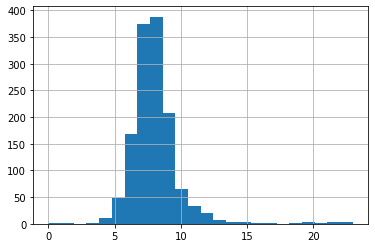

In [132]:
ques_dams_m['hour'].hist(bins=24)

In [133]:
#damsの評価指標を追加
#肯定的気分
ques_dams_m['positive_score']=(ques_dams_m['haturatu']+ques_dams_m['uresii']+ques_dams_m['tanosii'])/3
ques_dams_m['depressive_score']=(ques_dams_m['kurai']+ques_dams_m['iyana']+ques_dams_m['sizunda'])/3
ques_dams_m['anxious_score']=(ques_dams_m['kigakarina']+ques_dams_m['fuan']+ques_dams_m['sinpaina'])/3

In [144]:
ques_dams_m = ques_dams_m.reset_index(drop=True)
ques_dams_m['datetime_jp_before3'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=3)
ques_dams_m['datetime_jp_before6'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=6)
ques_dams_m['datetime_jp_before9'] =  ques_dams_m['datetime_jp']-dt.timedelta(hours=9)

In [147]:
# ques_dams_m.drop(['Date','datetime'],axis=1).to_csv('./datas/preprocessed_questionaire/ques_morning_dams.csv')